In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import urllib3
from selenium import webdriver

In [ ]:
# pip install --upgrade certifi
# pip install selenium

In [16]:
# df_test = pd.DataFrame(columns=['Entidad', 'Quejas', '%'])
# df_ind_autoridad_IMMSS = pd.DataFrame(columns=['Entidad', 'Ano', 'Tipo', 'Descripcion', 'Cantidad'])
df_ind_autoridad = pd.DataFrame(columns=['Autoridad', 'Entidad', 'Ano', 'Tipo', 'Descripcion', 'Cantidad'])
df_hechos_violatorios = pd.DataFrame(columns=['Hecho_Violatorio', 'Autoridad', 'Ano', 'Entidad', 'Cantidad_Quejas'])
df_hechos_violatorios_Miunicipios = pd.DataFrame(columns=['Hecho_Violatorio', 'Autoridad', 'Ano', 'Entidad', 'Municipio', 'Cantidad_Quejas'])

list_años = [2014,2015,2016,2017,2018,2019,2020,2021,2022]
list_pages_Ind_Autoridad = []


list_Indcadores_Autoridad = [
    # "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=1063&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=28780&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=31&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=1114&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=24040&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=85&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=24061&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=853&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=1289&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=132&Id_Estado=",
    "https://appweb2.cndh.org.mx/sna/ind_Autoridad_SM_3.asp?Id_Aut=622&Id_Estado=",

]
# ------- Hechos violatorios
list_pages_hv_get_autoridad = []
list_hv_autoridades_url = []
list_HV_HTML = []
dict_HV_URL = {}  # Creating an empty dictionary
for anio in list_años:
    dict_HV_URL[str(anio)] = []

list_Hechos_Violatorios_URL = [
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=478",
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=396",
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=394",
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=412",
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=230",
    "https://appweb2.cndh.org.mx/sna/ind_HV_SM_1.asp?Id_ViolaUni=512"
]

# ------- Hechos violatorios
list_pages_hv_get_autoridad = []
list_hv_autoridades_url = []
list_HV_HTML = []
dict_HV_URL = {}  # Creating an empty dictionary
for anio in list_años:
    dict_HV_URL[str(anio)] = []


def Obtener_Estado_Titulo(page_Indicador_Autoridad):
    soup_estado = BeautifulSoup(page_Indicador_Autoridad, "html.parser")
    estado_texto = soup_estado.find(class_="TituloEncabezadoTercerNivel")
    return estado_texto.get_text(strip=True)
    

def Obtener_Año(page_Indicador_Autoridad):
    soup_anio = BeautifulSoup(page_Indicador_Autoridad, "html.parser")
    # Checar si el estado tiene informacion para ese año
    title_text = soup_anio.title.get_text()
    if(title_text != "500 - Internal server error."):
        anio_texto = soup_anio.find(class_="Seleccionado")        
    return anio_texto.get_text(strip=True)

def Obtener_Autoridad(page_Indicador_Autoridad):
    soup_autoridad = BeautifulSoup(page_Indicador_Autoridad, "html.parser")
    # Checar si el estado tiene informacion para ese año
    title_text = soup_autoridad.title.get_text()
    if(title_text != "500 - Internal server error."):
        autoridad_text = soup_autoridad.find(class_="TituloPrimerNivel")
        return autoridad_text.get_text(strip=True)

def Obtener_Autoridad_Hechos_Violatorios(page_hv):
    soup_hv = BeautifulSoup(page_hv, "html.parser")
    # Checar si el estado tiene informacion para ese año
    title_text = soup_hv.title.get_text()
    if(title_text != "500 - Internal server error."):
        autoridad_text = soup_autoridad.find(class_="TituloPrimerNivel")
        return autoridad_text.get_text(strip=True)

### Obtener HTML de cada sector

In [166]:
# Create a new instance of the Firefox driver (you can use other browsers as well)
driver = webdriver.Firefox()
for anio in list_años[4:len(list_años)]:
    
    set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio" + str(anio) + ".asp"
    if (anio == 2015):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicioant.asp"
    if (anio == 2022):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio.asp"

    # Navigate to the URL
    driver.get(set_anio_page)

    for ind_Autoridad in list_Indcadores_Autoridad:
        
        for estado_concepto in range(1,35):
            url_CNDH = ind_Autoridad + str(estado_concepto)
            driver.get(url_CNDH)

            # Wait for the page to load completely (you can adjust the timeout as needed)
            timeout = 7
            driver.implicitly_wait(timeout)

            # Get the fully loaded page source
            page_source = driver.page_source
            list_pages_Ind_Autoridad.append(page_source)
            
# Close the browser
driver.quit()   


## Indicadores por Autoridad
---

In [6]:
# Obtener los datos de todos los estados

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(list_htmlResults[0], "html.parser")

# Find the parent element by its ID
parent_element_id = "marcoEntidades"
parent_div = soup.find(id=parent_element_id)

if parent_div:
    # Find the <table> element inside the parent <div> element
    table_element = parent_div.find("table")

    if table_element:
        # Process the table content here
        # For example, you can iterate over rows and cells using nested loops
        contador = 0
        for row in table_element.find_all("tr"):
            cells = row.find_all("td")
            row_data = [cell.get_text(strip=True) for cell in cells]
            if(contador > 0):
                df_test.loc[len(df_test.index)] = [row_data[0], row_data[1], row_data[2]]
            contador = contador + 1
            
    else:
        print("Table element not found inside the parent div.")
else:
    print("Parent div element not found.")

In [174]:
len(list_pages_Ind_Autoridad)

3060

---

### Obteniendo los valores de cada estado - IMSS

Aqui obtenemos los tipos de violaciones y agregamos las columnas al dataframe

In [195]:
# Obtener los Hechos Violatorios - Datos
contador = 0
for page_Indicador_Autoridad in list_pages_Ind_Autoridad:
    # Create a BeautifulSoup object to parse the HTML content
    
    soup = BeautifulSoup(page_Indicador_Autoridad, "html.parser")
    title_text = soup.title
    if(title_text):
        title_text = title_text.get_text()
    else:
        print(contador)
        contador = contador + 1
        continue
    
    
    # Skipp if the page does not exist
    if(title_text != "500 - Internal server error."):       
        
        autoridad_ = Obtener_Autoridad(page_Indicador_Autoridad)
        # Find the parent element by its ID
        parent_div = soup.find(id="contenidoHechosViolatorios")
        if parent_div:
            # Find the <table> element inside the parent <div> element
            table_element = parent_div.find("table")

            if table_element:
                # Process the table content here
                # For example, you can iterate over rows and cells using nested loops
                contador = 0
                for row in table_element.find_all("tr"):
                    cells = row.find_all("td")
                    row_data = [cell.get_text(strip=True) for cell in cells]
                    df_ind_autoridad.loc[len(df_ind_autoridad.index)] = [autoridad_, Obtener_Estado_Titulo(page_Indicador_Autoridad), Obtener_Año(page_Indicador_Autoridad), 'Hecho_Violatorio', row_data[0], row_data[1]]
                    
            else:
                print("Table element not found inside the parent div.")
        else:
            print("Parent div element not found.")

        # -----------------------------------------------------------------
        # Get Motivos de Conlusion

        # Find the parent element by its ID
        parent_div = soup.find(id="contenidoMotivos")
        if parent_div:
            # Find the <table> element inside the parent <div> element
            table_element = parent_div.find("table")

            if table_element:
                # Process the table content here
                # For example, you can iterate over rows and cells using nested loops
                contador = 0
                for row in table_element.find_all("tr"):
                    cells = row.find_all("td")
                    row_data = [cell.get_text(strip=True) for cell in cells]
                    df_ind_autoridad.loc[len(df_ind_autoridad.index)] = [autoridad_, Obtener_Estado_Titulo(page_Indicador_Autoridad), Obtener_Año(page_Indicador_Autoridad), 'Motivo_Conclusion', row_data[0], row_data[1]]
                    
            else:
                print("Table element not found inside the parent div.")
        else:
            print("Parent div element not found.")


0
0


In [197]:
df_ind_autoridad.to_csv("DF_DH_Por_Sector.csv")
# df_ind_autoridad_IMMSS.to_csv("Indicador_Autoridad_IMSS.csv")
# len(df_ind_autoridad[df_ind_autoridad["Tipo"] == "Hecho_Violatorio"]['Descripcion'].unique())

---
# Hechos Violatorios

1 - Obtener todas las paginas para obtener todas las autoridades por año

In [17]:
# Create a new instance of the Firefox driver (you can use other browsers as well)
driver = webdriver.Firefox()
# for anio in list_años[4:len(list_años)]:
for anio in list_años:
    
    set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio" + str(anio) + ".asp"
    if (anio == 2015):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicioant.asp"
    if (anio == 2022):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio.asp"

    # Navigate to the URL
    driver.get(set_anio_page)

    for hv_ in list_Hechos_Violatorios_URL:

        url_CNDH = hv_
        driver.get(url_CNDH)
        timeout = 7
        driver.implicitly_wait(timeout)
        # Get the fully loaded page source
        page_source = driver.page_source
        list_pages_hv_get_autoridad.append(page_source)
            
# Close the browser
driver.quit()   


In [ ]:
# list_pages_hv_get_autoridad
# list_Hechos_Violatorios_Get_Autoridades
# list_pages_hv_get_autoridad = []
# list_años
# list_hv_autoridades = []
# len(list_pages_hv_get_autoridad)
# list_hv_autoridades

2 - Obtener link de la tabla de resultados para cada autoridad por cada hecho violatorio
Puesto que cada pagina en "list_pages_hv_get_autoridad" contiene todo el HTML por cada año

In [49]:
# Obtener todas las autoridades 
for page_hv in list_pages_hv_get_autoridad:

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page_hv, "html.parser")
    title_text = soup.title.get_text()
    if(title_text != "500 - Internal server error."):

        # Find the parent element by its ID
        parent_element_id = "contenidoEntidades"
        currentYear = soup.find(class_="Seleccionado").get_text(strip=True)
        parent_div = soup.find(id=parent_element_id)
        

        if parent_div:
            # Find the <table> element inside the parent <div> element
            table_element = parent_div.find("table")

            if table_element:
                # Find all <a> elements within the <table>
                a_elements = table_element.find_all("a")

                # Extract and print the href attributes
                for a_element in a_elements:
                    href_value = a_element['href']
                    # list_hv_autoridades_url.append(href_value)
                    dict_HV_URL[currentYear].append(href_value)
                                       
            else:
                print("Table element not found inside the parent div.")
        else:
            print("Parent div element not found.")

In [72]:
len(list_HV_HTML)

1651

3 - Obtener HTML con tabla de resultados de cada hecho violatorio por año de cada autoridad

In [ ]:
# Create a new instance of the Firefox driver (you can use other browsers as well)
driver = webdriver.Firefox()

for anio in dict_HV_URL:
    set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio" + str(anio) + ".asp"
    if (anio == "2015"):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicioant.asp"
    if (anio == "2022"):
        set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio.asp"

    # Navigate to the URL
    driver.get(set_anio_page)

    # for page_hv in list_Hechos_Violatorios:
    for url_autoridad in dict_HV_URL[anio]:
        url_CNDH = "https://appweb2.cndh.org.mx/sna/" + url_autoridad
        driver.get(url_CNDH)
        timeout = 7
        driver.implicitly_wait(timeout)
        # Get the fully loaded page source
        page_source = driver.page_source
        list_HV_HTML.append(page_source)
            
# Close the browser
driver.quit() 

4 - Obtener datos del HTML de cada Hecho Violatorio por año,

In [91]:
# list_HV_HTML[0]
# df_hechos_violatorios = pd.DataFrame(columns=['Hecho_Violatorio', 'Autoridad', 'Ano', 'Entidad', 'Cantidad_Quejas'])
df_hechos_violatorios.to_csv("Hechos_Violatorios.csv")

In [ ]:
for html_HV in list_HV_HTML:

    soup = BeautifulSoup(html_HV, "html.parser")

    # Find the parent element by its ID
    parent_element_id = "contenidoHechosViolatorios"
    parent_div = soup.find(id=parent_element_id)

    if parent_div:
        # Find the <table> element inside the parent <div> element
        table_element = parent_div.find("table")

        if table_element:
            # Obtener Autoridad
            autoridad_ = soup.find(class_="TituloTercerNivelA").get_text(strip=True)
            hecho_Violatorio_ = soup.find(class_="TituloPrimerNivel").get_text(strip=True)
            for row in table_element.find_all("tr"):
                cells = row.find_all("td")
                row_data = [cell.get_text(strip=True) for cell in cells]
                df_hechos_violatorios.loc[len(df_hechos_violatorios.index)] = [hecho_Violatorio_, autoridad_, Obtener_Año(html_HV), row_data[0], row_data[1]]
                
        else:
            print("Table element not found inside the parent div.")
    else:
        print("Parent div element not found.")

---

# Indicadores por Entidad Federativa

1 - Checar cada link de cada año

In [18]:
# Create a new instance of the Firefox driver (you can use other browsers as well)
driver = webdriver.Firefox()
# for anio in list_años[4:len(list_años)]:
# for anio in list_años:
anio = 2014
set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio" + str(anio) + ".asp"
if (anio == 2015):
    set_anio_page = "https://appweb2.cndh.org.mx/sna/inicioant.asp"
if (anio == 2022):
    set_anio_page = "https://appweb2.cndh.org.mx/sna/inicio.asp"

# Navigate to the URL
driver.get(set_anio_page)
driver.get("https://appweb2.cndh.org.mx/sna/ind_EF_SM_mun_4.asp?Id_Aut=853&Id_Ef=10&Id_Estado=10&Id_Mun=502&valorAut=416&valorMun=50")

timeout = 7
driver.implicitly_wait(timeout)
# Get the fully loaded page source
page_source = driver.page_source

# Obtener todos los links de los estados
soup = BeautifulSoup(page_source, "html.parser")
parent_div = soup.find(id="contenidoAutoridad")
if parent_div:    
    table_element = parent_div.find("table")
    if table_element:
        href_list = table_element.find_all(href=True)
        for elem in href_list:
            # print(elem["href"])
            # 1 - URL de Cada Estado --------------------------------------
            url_estado = "https://appweb2.cndh.org.mx/sna/" + elem["href"]
            driver.get(url_estado)
            html_estado_info = driver.page_source
            # Obtener las autoridades por estado
            soup_estado = BeautifulSoup(html_estado_info, "html.parser")
            parent_div2 = soup_estado.find(id="contenidoEntidades")
            nombre_estado = soup_estado.find(class_="TituloPrimerNivel").get_text(strip=True)
            if parent_div2:
                table_element_estado = parent_div2.find("table")
                href_list_autoridad = table_element_estado.find_all('a', href=True)
                for href_autoridad in href_list_autoridad:
                    # print(nombre_estado, " - ", url_autoridad["href"])
                    # 2 - URL Cada Autoridad ----------------------------------
                    url_autoridad = "https://appweb2.cndh.org.mx/sna/" + href_autoridad["href"]
                    driver.get(url_autoridad)
                    html_autoridad_info = driver.page_source
                    # Obtener las autoridades por estado
                    soup_autoridad = BeautifulSoup(html_autoridad_info, "html.parser")
                    parent_div3 = soup_autoridad.find(id="contenidoHechosViolatorios")
                    # nombre_autoridad = soup_autoridad.find(class_="TituloTercerNivelA").get_text(strip=True)
                    nombre_autoridad = href_autoridad.get_text()

                    if parent_div3:
                        table_element_municipio = parent_div3.find("table")
                        href_list_municipio = table_element_municipio.find_all('a', href=True)
                        for href_municipio in href_list_municipio:
                            # print(nombre_estado, " - ", nombre_autoridad, " - ",  href_municipio["href"])
                            # 3 - URL Cada Municipio  ----------------------------------
                            url_municipio = "https://appweb2.cndh.org.mx/sna/" + href_municipio["href"]
                            driver.get(url_municipio)
                            html_municipio_info = driver.page_source
                            # 4 - Obtener datos y guardarlos
                            soup_municipio = BeautifulSoup(html_municipio_info, "html.parser")
                            parent_div4 = soup_municipio.find(id="contenidoHVEF")
                            # nombre_municipio = soup_municipio.find(class_="TituloTercerNivelA").get_text(strip=True)
                            if parent_div4:
                                table_element_hv = parent_div4.find("table")
                                # href_list_municipio = table_element_municipio.find_all(href=True)
                                for row in table_element_hv.find_all("tr"):
                                    cells = row.find_all("td")
                                    row_data = [cell.get_text(strip=True) for cell in cells]
                                    df_hechos_violatorios_Miunicipios.loc[len(df_hechos_violatorios_Miunicipios.index)] = [row_data[0], nombre_autoridad, anio, nombre_estado, href_municipio.get_text(), row_data[1]]
                                    # df_hechos_violatorios_Miunicipios = pd.DataFrame(columns=['Hecho_Violatorio', 'Autoridad', 'Ano', 'Entidad', 'Municipio', 'Cantidad_Quejas'])
                                    



    # list_pages_hv_get_autoridad.append(page_source)
            
# Close the browser
driver.quit()   


AttributeError: 'NoneType' object has no attribute 'get_text'

In [20]:
# df_hechos_violatorios_Miunicipios = pd.DataFrame(columns=['Hecho_Violatorio', 'Autoridad', 'Ano', 'Entidad', 'Municipio', 'Cantidad_Quejas'])
# df_hechos_violatorios_Miunicipios

,Hecho_Violatorio,Autoridad,Ano,Entidad,Municipio,Cantidad_Quejas
0,PRESTAR INDEBIDAMENTE EL SERVICIO DE EDUCACION,SECRETARIA DE EDUCACION PUBLICA 416,2014,DISTRITO FEDERAL1821,\n ...,42
1,IMPEDIR EL ACCESO A SERVICIOS DE EDUCACION,SECRETARIA DE EDUCACION PUBLICA 416,2014,DISTRITO FEDERAL1821,\n ...,3
2,OMITIR RESPETAR LOS DERECHOS DE LAS PERSONAS C...,SECRETARIA DE EDUCACION PUBLICA 416,2014,DISTRITO FEDERAL1821,\n ...,3
3,OMITIR FUNDAR EL ACTO DE AUTORIDAD,SECRETARIA DE EDUCACION PUBLICA 416,2014,DISTRITO FEDERAL1821,\n ...,2
4,OMITIR MOTIVAR EL ACTO DE AUTORIDAD,SECRETARIA DE EDUCACION PUBLICA 416,2014,DISTRITO FEDERAL1821,\n ...,2
...,...,...,...,...,...,...
5704,IMPEDIR EL EJERCICIO DEL DERECHO AL TRABAJO DI...,PROCURADURIA FEDERAL DEL CONSUMIDOR 1,2014,NAYARIT283,\n ...,1
5705,"FALTAR A LA LEGALIDAD, HONRADEZ, LEALTAD, IMPA...","SECRETARIA DE DESARROLLO AGRARIO, TERRITORIAL ...",2014,NAYARIT283,\n ...,1
5706,PRESTAR INDEBIDAMENTE EL SERVICIO DE EDUCACION,SECRETARIA DE EDUCACION PUBLICA 1,2014,NAYARIT283,\n ...,1
5707,PRESTAR INDEBIDAMENTE EL SERVICIO PUBLICO,SECRETARIA DE RELACIONES EXTERIORES 1,2014,NAYARIT283,\n ...,1


In [10]:
df_ind_Autoridad = pd.read_csv("DF_DH_Por_Sector.csv", index_col=None)
df_ind_Autoridad = df_ind_Autoridad.drop('Unnamed: 0', axis=1)

In [16]:
df_ind_Autoridad

,Autoridad,Entidad,Ano,Tipo,Descripcion,Cantidad
0,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,AGUASCALIENTES,2014,Hecho_Violatorio,ACCIONES Y OMISIONES QUE TRANSGREDEN LOS DEREC...,1
1,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,AGUASCALIENTES,2014,Hecho_Violatorio,OMITIR FUNDAR EL ACTO DE AUTORIDAD,1
2,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,AGUASCALIENTES,2014,Hecho_Violatorio,PRESTAR INDEBIDAMENTE EL SERVICIO PUBLICO,1
3,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,BAJA CALIFORNIA,2014,Hecho_Violatorio,ACCIONES Y OMISIONES QUE TRANSGREDEN LOS DEREC...,10
4,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,BAJA CALIFORNIA,2014,Hecho_Violatorio,PRESTAR INDEBIDAMENTE EL SERVICIO PUBLICO,10
...,...,...,...,...,...,...
19361,SECRETARIA DE LA DEFENSA NACIONAL,ZACATECAS,2022,Hecho_Violatorio,"FALTAR A LA LEGALIDAD, HONRADEZ, LEALTAD, IMPA...",1
19362,SECRETARIA DE LA DEFENSA NACIONAL,ZACATECAS,2022,Hecho_Violatorio,PRESTAR INDEBIDAMENTE EL SERVICIO PUBLICO,1
19363,SECRETARIA DE LA DEFENSA NACIONAL,ZACATECAS,2022,Motivo_Conclusion,ORIENTACION,10
19364,SECRETARIA DE LA DEFENSA NACIONAL,ZACATECAS,2022,Motivo_Conclusion,DURANTE EL TRAMITE RESPECTIVO,1


## Histograma

In [23]:
import plotly.express as px
df_filtred = df_ind_Autoridad[(df_ind_Autoridad["Tipo"] == 'Hecho_Violatorio') & (df_ind_Autoridad["Entidad"] == 'SONORA') & (df_ind_Autoridad["Autoridad"] == 'INSTITUTO NACIONAL DE MIGRACION DE LA SECRETARIA DE GOBERNACION')]
fig = px.histogram(df_filtred, x="Descripcion")
fig.show()

In [25]:

fig = px.line(df_filtred, x='Ano', y='Cantidad', color='Descripcion', markers=True)
fig.show()

In [46]:
df_filtred2 = df_ind_Autoridad[(df_ind_Autoridad["Tipo"] == 'Hecho_Violatorio') & (df_ind_Autoridad["Autoridad"] == 'INSTITUTO NACIONAL DE MIGRACION DE LA SECRETARIA DE GOBERNACION')
# & (df_ind_Autoridad["Cantidad"] > 1) 
& (df_ind_Autoridad["Entidad"] == 'SONORA')]
# df_filtred2
# fig = px.bar(df_filtred2, x='Ano', y='Cantidad', color='Descripcion')
fig = px.histogram(df_filtred2, x="Descripcion")
fig.show()

In [20]:
df_ind_Autoridad["Autoridad"].unique()

array(['INSTITUTO NACIONAL DE MIGRACION DE LA SECRETARIA DE GOBERNACION',
       'INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO',
       'ORGANO ADMINISTRATIVO DESCONCENTRADO PREVENCION Y READAPTACION SOCIAL DE LA SECRETARIA DE GOBERNACIÓN',
       'SECRETARIA DE LA DEFENSA NACIONAL',
       'POLICIA FEDERAL DE LA SECRETARIA DE GOBERNACION',
       'SECRETARIA DE EDUCACION PUBLICA',
       'PROCURADURIA GENERAL DE LA REPUBLICA', 'SECRETARIA DE MARINA',
       'INSTITUTO DEL FONDO NACIONAL DE LA VIVIENDA PARA LOS TRABAJADORES',
       'ORGANO ADMINISTRATIVO DESCONCENTRADO PREVENCION Y READAPTACION SOCIAL DE LA SSPC'],
      dtype=object)

In [21]:
df_ind_Autoridad[(df_ind_Autoridad["Tipo"] == 'Hecho_Violatorio') & (df_ind_Autoridad["Entidad"] == 'SONORA') & (df_ind_Autoridad["Autoridad"] == 'INSTITUTO NACIONAL DE MIGRACION DE LA SECRETARIA DE GOBERNACION')]

,Autoridad,Entidad,Ano,Tipo,Descripcion,Cantidad
235,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2014,Hecho_Violatorio,EMPLEAR ARBITRARIAMENTE LA FUERZA PUBLICA,2
236,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2014,Hecho_Violatorio,"FALTAR A LA LEGALIDAD, HONRADEZ, LEALTAD, IMPA...",2
237,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2014,Hecho_Violatorio,PRESTAR INDEBIDAMENTE EL SERVICIO PUBLICO,2
238,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2014,Hecho_Violatorio,ACCIONES Y OMISIONES QUE TRANSGREDEN LOS DEREC...,1
239,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2014,Hecho_Violatorio,DETENCION ARBITRARIA,1
...,...,...,...,...,...,...
18481,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2022,Hecho_Violatorio,OMITIR MOTIVAR EL ACTO DE AUTORIDAD,2
18482,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2022,Hecho_Violatorio,DEPORTAR EN FORMA ILEGAL,1
18483,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2022,Hecho_Violatorio,DETENCION ARBITRARIA,1
18484,INSTITUTO NACIONAL DE MIGRACION DE LA SECRETAR...,SONORA,2022,Hecho_Violatorio,INTIMIDACION,1


# Charts with Python and R

In this article we will explain the use of code for some charts and how to implement on Python or R. Take note that this are examples, you can do it a different way, use other libreries, add or remove content inside, so it is important to always look at the official documentation if you want to learn more.

Here we will cover the next charts:
- Line
- Histogram
- Georeferencial
- ...

Authors:
- Melissa Reyes
- Santiago
- Ariel López

(Optional)
In order to test preciscly what we have done, we will let you some data that you can dowload to test test our examples and get the same chart as we display below.

## Line Chart

(Optional)
Best use of this:
According to [Page](www) the best use of this kind of chart...

**Python**
``` 
# Libreries needed...
import pandas as pd
print("Hello World")
```
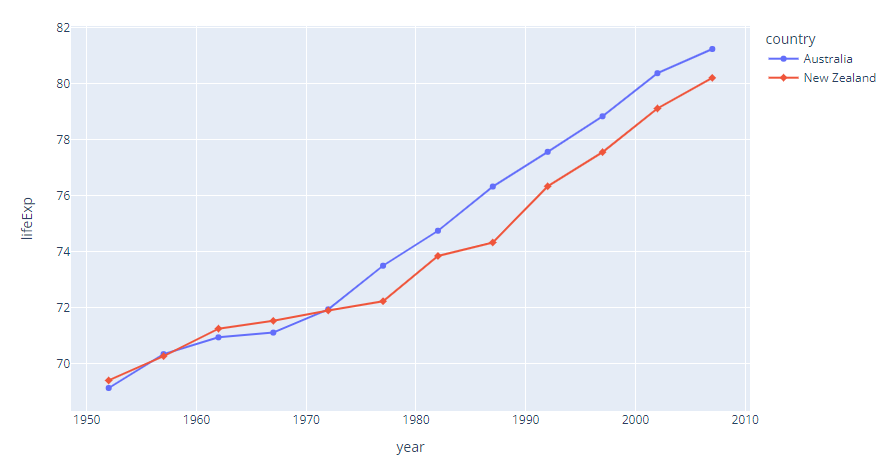

**R**
```
print("Hello World")
```
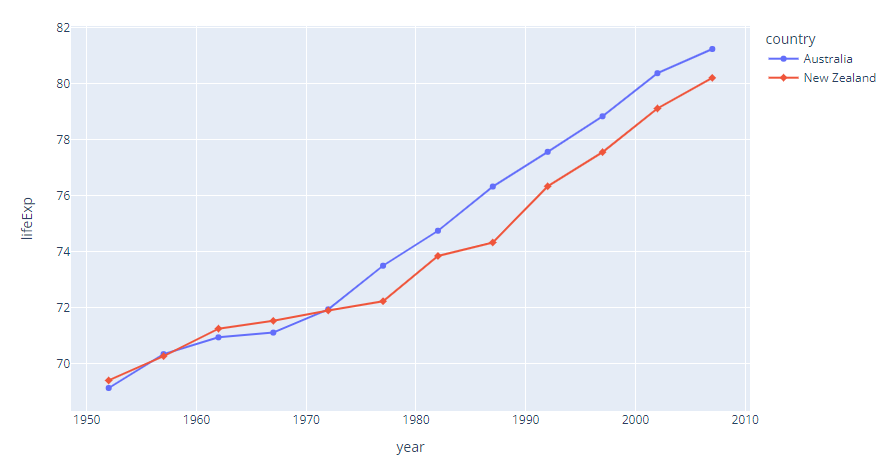

## Histogram

(Optional)
Best use of this:

**Python**
```
print("Hello World")
```

**R**
```
print("Hello World!")
```

## Histogram

**Python**
```
print("Hello World")
```

**R**
```
print("Hello World!")

```

# About the Authors

- Melissa
I am super women and economist coursing my master degree on Data Science, looking...

- Santiago
I am Economist... with the goal of ...

- Ariel
I am a lazy man with no goals in life...

# Thanks (Optional)

Maestria en Ciencia de Datos de la Universidad de Sonora ([MCD](https://mcd.unison.mx/))
